# GitHub Analyzer

This notebook generates a couple of `pandas.Dataframe` for git and GitHub issues (that includes issues and pull requests) of GitHub projects

Let's start by importing the needed libraries:
* [MyUtils](MyUtils.py) is Python code I've written to ease data collection, mostly thanks to [GrimoireLab/Perceval](https://github.com/chaoss/grimoirelab-perceval/).
* matplotlib is used to make some charts (Yes, I know there are cooler options, but this *just* works).

In [3]:
import MyUtils as utils
import matplotlib.pyplot as plt
%matplotlib notebook

Let's get the list of repos to analyze. For example all the repos from a given organization or user.

**Note**: You can also provide your custom list of repos if it's written as a list of dictionaries like this:
```
[
  {
    "owner": ...
    "name": ...
    "url": ...
  },
  ...
]
```

In [4]:
repos = utils.owner_repositories('xamarin')

Let's check the number of repositories identified.

**Note**: Forks are not included

In [3]:
len(repos)

118

## Analyzing Git data

Let's get some data related with commits and store it.

**Note**: This take a while (from minutes to hours depending on the number of repositories and their activity).

In [4]:
git_data = utils.GitData(repos).dataframe

Let's print a pie chart with the email domains used by the commit authors.

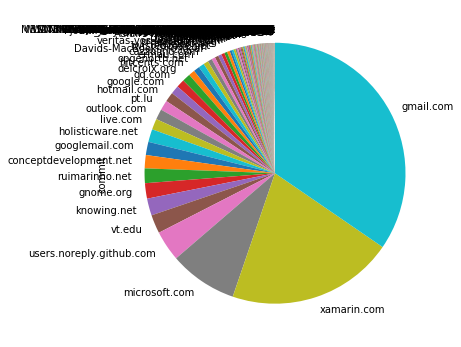

In [5]:
git_data.groupby(['email_domain'])['commit'].nunique().sort_values().plot.pie(figsize=(6,6),startangle=90) 

Let's see the evolution of commits by month.

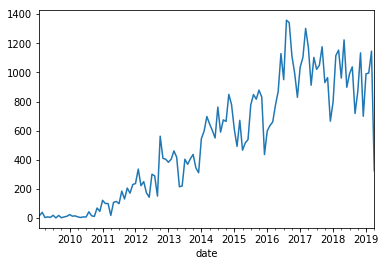

In [7]:
git_data['2009-01-01':].resample('M').commit.nunique().plot()

Let's see the evolution of active repositories by month.

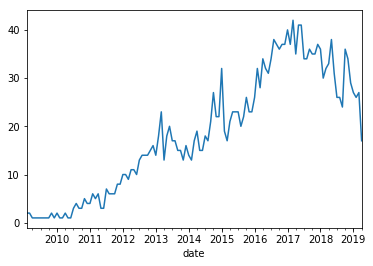

In [8]:
git_data['2009-01-01':].resample('M').repository.nunique().plot()

Let's see the evolution unique names, emails addresses, and email domains used by commit authors by month.

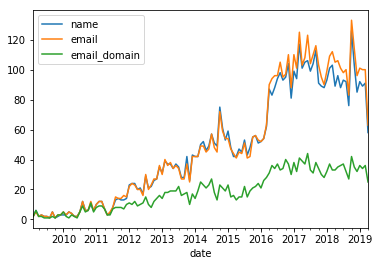

In [9]:
git_data['2009-01-01':].resample('M')['name','email','email_domain'].nunique().plot()

## Analyzing GitHub Issues data

We need a valid [GitHub token](https://help.github.com/en/articles/creating-a-personal-access-token-for-the-command-line) to deal with rate limits.

In [1]:
GITHUB_TOKEN = ["PUT-A-GITHUB-TOKEN-HERE"] # You can put a list of valid GH tokens

Let's get some data related with issues and pull requests and store it.

**Note**: This can take from minutes to hours (like the whole night for example), depending on the number of repositories and their issues and pull requests.

In [5]:
github_issues_data = utils.GitHubData(repos, GITHUB_TOKEN).dataframe

In [6]:
github_issues_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22102 entries, 2016-03-23 17:18:56+00:00 to 2019-04-10 11:45:06+00:00
Data columns (total 8 columns):
author           22102 non-null object
comments         22102 non-null float64
issue            22102 non-null object
issue_type       22102 non-null object
repository       22102 non-null object
state            22102 non-null object
time_to_solve    22102 non-null object
title            22102 non-null object
dtypes: float64(1), object(7)
memory usage: 1.5+ MB


Let's see the evolution of active GitHub issues or pull requests repositories by month.

/home/jsmanrique/devel/venvs/my-jupiter-notebooks/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


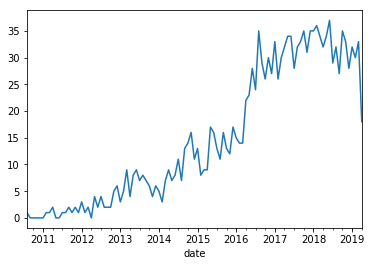

In [11]:
github_issues_data.resample('M').repository.nunique().plot()

Let's see the evolution of issues and pull requests by month.

/home/jsmanrique/devel/venvs/my-jupiter-notebooks/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


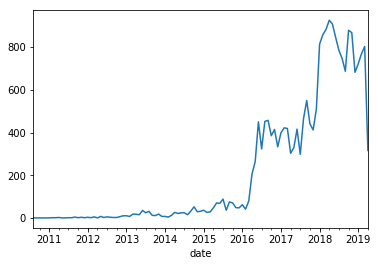

In [7]:
github_issues_data.resample('M').issue.nunique().plot()

Let's get the current number of issues and pull requests by status

In [8]:
github_issues_data.groupby(['issue_type', 'state']).issue.nunique()

issue_type    state 
issue         closed     5765
              open       2780
pull-request  closed    13224
              open        333
Name: issue, dtype: int64

Let's see the evolution of comments in issues and pull requests by month.

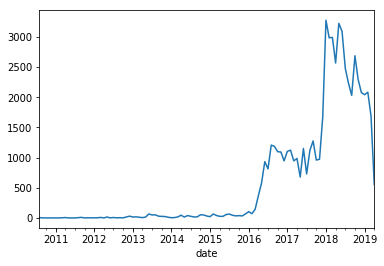

In [9]:
github_issues_data.resample('M').comments.sum().plot()